In [78]:
import pandas as pd
import numpy as np
%matplotlib inline

In [42]:
statement_dates = pd.read_csv('statement_dates.csv')
spx = pd.read_csv('.\index_data\$SPX.csv',parse_dates=['Date'])

In [43]:
dateparse = lambda x: pd.datetime.strptime(x, '%d%m%Y')
state_date_parse = lambda x: pd.datetime.strptime(x, '%Y%m%d')
spx['Date']=spx['Date'].apply(dateparse)

In [44]:
spx=spx.set_index(['Date'])

In [45]:
spx.drop(columns=['Open Interest','Ticker'], inplace=True)


In [46]:
spx = spx['2000-01-01':]

In [47]:
statement_dates['Statement']=np.ones(len(statement_dates))

In [49]:
statement_dates['Dates']=statement_dates['Dates'].apply(lambda x : str(x))

In [51]:
statement_dates['Dates']=statement_dates['Dates'].apply(state_date_parse)

In [54]:
statement_dates['Statement']=statement_dates['Statement'].apply(lambda x : int(x))

In [65]:
statement_dates=statement_dates.set_index(['Dates'])

In [67]:
spx_statements =spx.join(statement_dates, how='outer')


In [70]:
spx_statements = spx_statements[:'2019-03-01']

In [74]:
spx_statements=spx_statements.fillna(0)

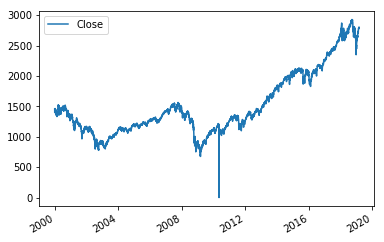

In [83]:
spx_statements.plot(y='Close')

In [109]:
spx_statements['Close'].idxmin() 

Timestamp('2010-05-09 00:00:00')

This date was a Sunday. Push Effects forward

In [119]:
spx_statements['2010-05-08':'2015-05-12']

,Open,High,Low,Close,Volume,Summary of Econ Projections,Statement,close_pct_change
2010-05-09,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.0,1.0,-1.000000
2010-05-10,1122.27002,1163.84998,1122.27002,1159.72998,5.925800e+09,0.0,0.0,inf
2010-05-11,1156.39001,1170.47998,1147.70996,1155.79004,4.776800e+09,0.0,0.0,-0.003397
2010-05-12,1155.43005,1172.87000,1155.43005,1171.67004,4.323200e+09,0.0,0.0,0.013740
2010-05-13,1170.04004,1173.56995,1156.14001,1157.43994,4.008700e+09,0.0,0.0,-0.012145
2010-05-14,1157.18994,1157.18994,1126.14001,1135.68005,5.036700e+09,0.0,0.0,-0.018800
2010-05-17,1136.52002,1141.88000,1114.95996,1136.93994,4.815600e+09,0.0,0.0,0.001109
2010-05-18,1138.78003,1148.66003,1117.19995,1120.80005,5.116000e+09,0.0,0.0,-0.014196
2010-05-19,1119.56995,1124.27002,1100.66003,1115.05005,5.477800e+09,0.0,0.0,-0.005130
2010-05-20,1107.33997,1107.33997,1071.57996,1071.58997,6.833600e+09,0.0,0.0,-0.038976


In [87]:
spx_statements['close_pct_change']=spx_statements.pct_change()['Close']

In [95]:
pd.DataFrame(spx_statements[spx_statements['Statement']==1]['close_pct_change'].describe())

,close_pct_change
count,163.000000
mean,-0.002964
std,0.079778
min,-1.000000
25%,-0.003938
50%,0.000911
75%,0.008906
max,0.051360


In [96]:
pd.DataFrame(spx_statements['close_pct_change'].describe())

,close_pct_change
count,4820.000000
mean,inf
std,NaN
min,-1.000000
25%,-0.004804
50%,0.000531
75%,0.005686
max,inf
